# This submission belongs to Abhigyan 1CR19CS004
Question: Write a Python program to calculate clusters using the Hierarchical Clustering
method. Perform Text analysis using topic modeling algorithms.

#Part A
#Heirarical Clustering


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
dataset = pd.read_csv('Mall_Customers.csv')

In [35]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
X = dataset.iloc[:,[3,4]].values #select a specific row or column from the data set

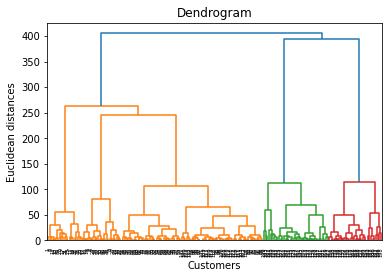

In [37]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#Fitting hierarchical clustering to the Mall_Customes dataset
There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
algorithm class

In [38]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')


In [39]:
y_hc = hc.fit_predict(X)

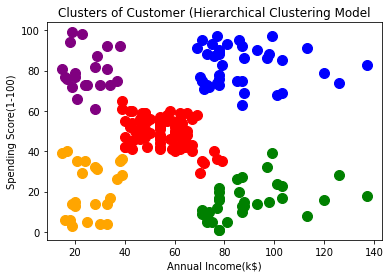

In [40]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

From this cluster we can infer that:
<br> Green: High Income vs Low Spending => careful
<br> Red: Normal Income vs Normal Spending => Standard
<br> Blue: High Income vs High Spending => Target
<br> Purple: Low Income vs High Spending => careless
<br> Orange: Low Income vs Low Spending => Sensible

#Text analysis using topic modelling

In [41]:
import pandas as pd
import os

In [42]:
papers  = pd.read_csv('/content/drive/MyDrive/Dataset/papers.csv')
#Uncomment the following lines if you are going to upload the file to Colab 
#from google.colab import files
#f = files.upload()
#papers  = pd.read_csv('papers.csv')

In [43]:
#papers = pd.read_csv('papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [44]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
2096,2005,Assessing Approximations for Gaussian Process ...,Abstract Missing,Assessing Approximations for\nGaussian Process...
2743,2008,Semi-supervised Learning with Weakly-Related U...,The cluster assumption is exploited by most se...,Semi-supervised Learning with Weakly-Related\n...
2519,2007,Linear programming analysis of loopy belief pr...,Loopy belief propagation has been employed in ...,Linear Programming Analysis of Loopy Belief\nP...
4294,2013,Optimizing Instructional Policies,Psychologists are interested in developing ins...,Optimizing Instructional Policies\nRobert V. L...
1448,2002,PAC-Bayes & Margins,Abstract Missing,shorter argument and much tighter than previo...


In [45]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x)) # removing special symbols


In [46]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

2096    assessing approximations for\ngaussian process...
2743    semi-supervised learning with weakly-related\n...
2519    linear programming analysis of loopy belief\np...
4294    optimizing instructional policies\nrobert v li...
1448    
shorter argument and much tighter than previo...
Name: paper_text_processed, dtype: object

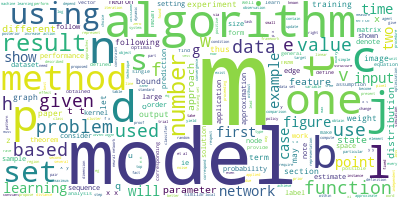

In [47]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [48]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['assessing', 'approximations', 'gaussian', 'process', 'classification', 'malte', 'kuss', 'carl', 'edward', 'rasmussen', 'max', 'planck', 'institute', 'biological', 'cybernetics', 'spemannstrae', 'tubingen', 'germany', 'kusscarl', 'tuebingenmpgde', 'abstract', 'gaussian', 'processes', 'attractive', 'models', 'probabilistic', 'classification', 'unfortunately', 'exact', 'inference']


In [49]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words # a group presenting multiple collections of text documents

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 7), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 2), (19, 1), (20, 2), (21, 5), (22, 1), (23, 1), (24, 2), (25, 1), (26, 6), (27, 1), (28, 4), (29, 1)]


In [50]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"set" + 0.005*"model" + 0.004*"learning" + 0.004*"algorithm" + '
  '0.004*"time" + 0.004*"figure" + 0.004*"data" + 0.004*"two" + 0.004*"one" + '
  '0.003*"function"'),
 (1,
  '0.007*"learning" + 0.005*"time" + 0.005*"data" + 0.004*"function" + '
  '0.004*"one" + 0.004*"model" + 0.004*"set" + 0.004*"number" + '
  '0.004*"algorithm" + 0.003*"network"'),
 (2,
  '0.008*"learning" + 0.006*"function" + 0.005*"data" + 0.005*"model" + '
  '0.004*"one" + 0.004*"algorithm" + 0.004*"set" + 0.004*"distribution" + '
  '0.003*"two" + 0.003*"based"'),
 (3,
  '0.011*"learning" + 0.006*"data" + 0.005*"function" + 0.004*"algorithm" + '
  '0.004*"model" + 0.004*"problem" + 0.004*"time" + 0.004*"one" + 0.004*"set" '
  '+ 0.004*"training"'),
 (4,
  '0.007*"learning" + 0.006*"data" + 0.005*"function" + 0.004*"algorithm" + '
  '0.004*"set" + 0.004*"training" + 0.003*"model" + 0.003*"time" + 0.003*"two" '
  '+ 0.003*"figure"'),
 (5,
  '0.009*"learning" + 0.005*"algorithm" + 0.005*"data" + 0.004*